In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm

In [59]:
df = pd.read_csv('brief_problem.csv')
df = df.replace({777:None,999:None})
subset_bpm = []
for i in range(1,20):
    subset_bpm.append(f"bpm_{i}_y")

df = df.dropna(subset=subset_bpm)

descriptions = df.iloc[0]
df = df.iloc[1:]

C:\Users\Matth\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (1,2,3,6,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
X = df.iloc[:,10:29]
y = df['adhd']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Logistic Regression

In [62]:
model = LogisticRegression(class_weight={0:1140,1:9275})
model.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1140, 1: 9275})

In [63]:
importance = model.coef_[0]

coefficients = []
for i in range(len(importance)):
    coefficients.append((X.columns[i],importance[i]))
    
to_show = 5  

sorted_coef = sorted(coefficients,key=lambda tup:abs(tup[1]))
bottom_5 = sorted_coef[:to_show]
top_5 = sorted_coef[-to_show:]

print(f'*** The {to_show} least predictive measures were: ***')
for index,(label,value) in enumerate(bottom_5):
    print(f"{len(coefficients)-index}. {descriptions[label].split(' / ')[0]}: {round(value,3)}")
print(f'\n*** The {to_show} most predictive measures were: ***')
for index,(label,value) in enumerate(top_5):
    print(f"{to_show-index}. {descriptions[label].split('. / ')[0]}: {round(value,3)}")

*** The 5 least predictive measures were: ***
19. I am self-conscious or easily embarrassed: 0.0
18. I disobey my parents: -0.0
17. I fail to finish things I start: 0.0
16. I am inattentive or easily distracted: 0.0
15. I feel too guilty: 0.0

*** The 5 most predictive measures were: ***
5. I disobey at school. (Interviewer: Please select "Not True" when participant is not in school at the time of the assessment.): 0.0
4. I feel worthless or inferior  Definition of inferior: less good: 0.0
3. I am stubborn: 0.001
2. I am unhappy, sad, or depressed: 0.001
1. I have trouble sitting still: -0.001


In [64]:
score = model.score(X_test,y_test)
print(score)

0.8830638297872341


In [65]:
scores = []

for j in range(1,len(coefficients)+1):
    
    result = []
    
    model = LogisticRegression(class_weight={0:11,1:89})
    labels = [entry[0] for entry in sorted_coef]
    subset = labels[-j:]

    X = df[subset]
    y = df['adhd']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)

    result.append(j)
    result.append(accuracy_score(y_test,y_pred))
    result.append(roc_auc_score(y_test, y_pred))
    result.append(recall_score(y_test,y_pred))
    for i in range(2):
        for k in range(2):
            result.append(matrix[i][k])
    
    #print(f"Top {j} features:")
    
    scores.append(result)

In [66]:
scores_df = pd.DataFrame(scores)
scores_df.columns = ['features','accuracy','auc','recall','tn','fn','fp','tp']

In [67]:
print(scores_df)

    features  accuracy       auc    recall     tn   fn    fp  tp
0          1  0.898298  0.499479  0.000850  10554   20  1175   1
1          2  0.896596  0.501500  0.004139  10530   12  1203   5
2          3  0.883830  0.502824  0.010542  10371   51  1314  14
3          4  0.891745  0.504094  0.014742  10460   69  1203  18
4          5  0.889106  0.502975  0.011952  10432   63  1240  15
5          6  0.887149  0.503796  0.015886  10404   87  1239  20
6          7  0.884340  0.504249  0.016154  10370   80  1279  21
7          8  0.894553  0.502998  0.014592  10494   91  1148  17
8          9  0.888511  0.504815  0.017628  10418   84  1226  22
9         10  0.883064  0.505316  0.020866  10349  107  1267  27
10        11  0.891149  0.506377  0.022425  10444  102  1177  27
11        12  0.881532  0.502709  0.020668  10332  160  1232  26
12        13  0.878383  0.505091  0.025307  10288  158  1271  33
13        14  0.886468  0.504982  0.024855  10386  157  1177  30
14        15  0.884511  0

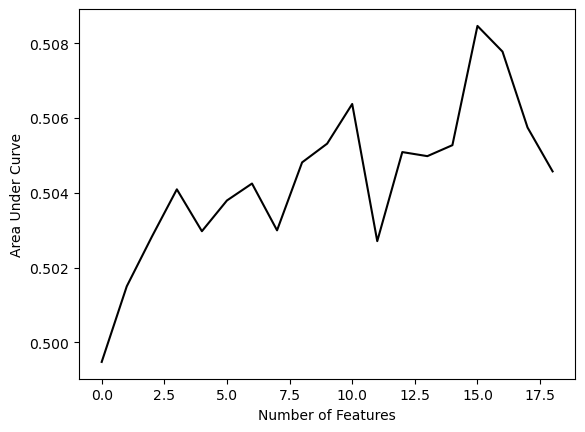

In [68]:
plt.plot(scores_df['auc'],color='black')
plt.xlabel('Number of Features')
plt.ylabel('Area Under Curve')
plt.show()

In [69]:
scores_weight = []

for i in np.arange(0,2,0.02):
    
    result = []
    
    model = LogisticRegression(class_weight={0:i,1:1})
    labels = [entry[0] for entry in sorted_coef]

    X = df.iloc[:,10:29]
    y = df['adhd']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)

    result.append(i)
    result.append(accuracy_score(y_test,y_pred))
    result.append(roc_auc_score(y_test, y_pred))
    result.append(recall_score(y_test,y_pred))
    for i in range(2):
        for k in range(2):
            result.append(matrix[i][k])
    
    #print(f"Top {j} features:")
    
    scores_weight.append(result)

C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [70]:
scores_weight_df = pd.DataFrame(scores_weight)
scores_weight_df.columns = ['i','accuracy','auc','recall','tn','fn','fp','tp']
print(scores_weight_df)

       i  accuracy       auc    recall     tn     fn    fp    tp
0   0.00  0.106128  0.500000  1.000000      0  10503     0  1247
1   0.02  0.104170  0.500000  1.000000      0  10526     0  1224
2   0.04  0.105106  0.499643  0.999190      1  10514     1  1234
3   0.06  0.104851  0.500095  1.000000      2  10518     0  1230
4   0.08  0.108340  0.499686  0.998419     10  10475     2  1263
..   ...       ...       ...       ...    ...    ...   ...   ...
95  1.90  0.898553  0.500000  0.000000  10558      0  1192     0
96  1.92  0.887149  0.499952  0.000000  10424      1  1325     0
97  1.94  0.885447  0.500000  0.000000  10404      0  1346     0
98  1.96  0.891915  0.500000  0.000000  10480      0  1270     0
99  1.98  0.896851  0.500000  0.000000  10538      0  1212     0

[100 rows x 8 columns]


In [71]:
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(np.arange(0,2,0.02),scores_weight_df['auc'],color='black')
plt.xlabel('Weighting Ratio (:1)')
plt.ylabel('Area Under Curve')

Text(0, 0.5, 'Area Under Curve')

In [72]:
scores_weight_zoom = []

for i in np.arange(0,0.5,0.001):
    
    result = []
    
    model = LogisticRegression(class_weight={0:i,1:1})
    labels = [entry[0] for entry in sorted_coef]

    X = df.iloc[:,10:29]
    y = df['adhd']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)

    result.append(i)
    result.append(accuracy_score(y_test,y_pred))
    result.append(roc_auc_score(y_test, y_pred))
    result.append(recall_score(y_test,y_pred))
    for i in range(2):
        for k in range(2):
            result.append(matrix[i][k])
    
    #print(f"Top {j} features:")
    
    scores_weight_zoom.append(result)

C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\Matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
scores_weight_zoom_df = pd.DataFrame(scores_weight_zoom)
scores_weight_zoom_df.columns = ['i','accuracy','auc','recall','tn','fn','fp','tp']
print(scores_weight_zoom_df)

         i  accuracy       auc    recall     tn     fn    fp    tp
0    0.000  0.104426  0.500000  1.000000      0  10523     0  1227
1    0.001  0.110298  0.499702  0.998447     10  10452     2  1286
2    0.002  0.108085  0.500048  1.000000      1  10480     0  1269
3    0.003  0.106638  0.500143  1.000000      3  10497     0  1250
4    0.004  0.103064  0.500000  1.000000      0  10539     0  1211
..     ...       ...       ...       ...    ...    ...   ...   ...
495  0.495  0.893191  0.500608  0.001596  10493      4  1251     2
496  0.496  0.894553  0.500975  0.002425  10508      5  1234     3
497  0.497  0.891489  0.499761  0.000000  10475      5  1270     0
498  0.498  0.892681  0.500604  0.001589  10487      4  1257     2
499  0.499  0.894128  0.500521  0.001613  10504      6  1238     2

[500 rows x 8 columns]


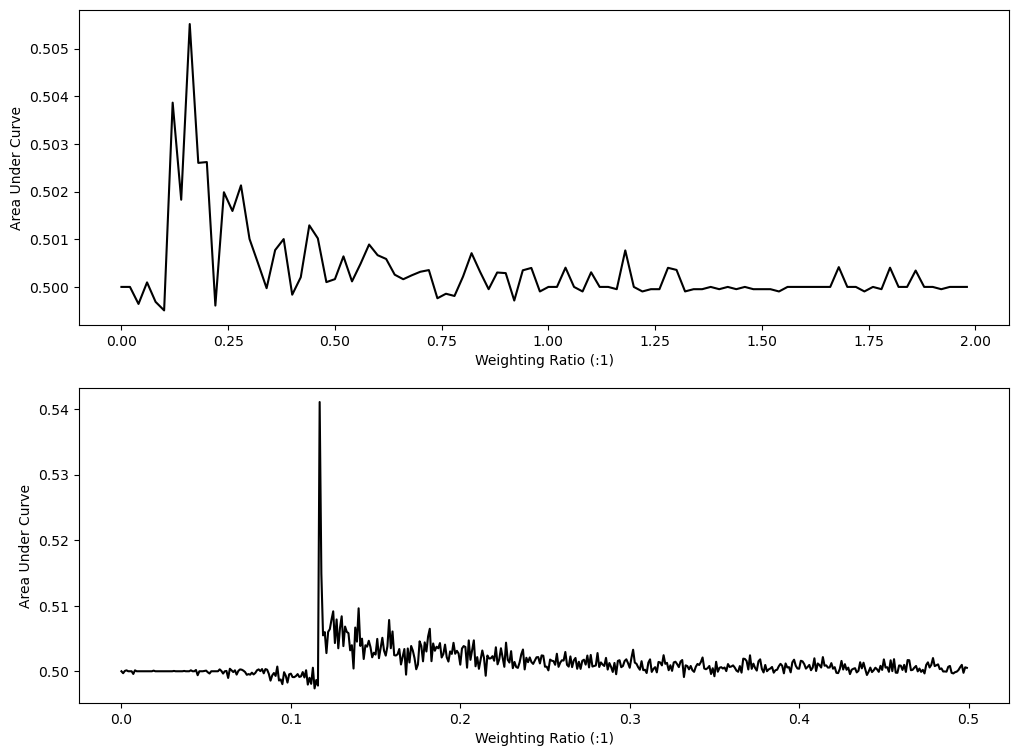

In [74]:
plt.subplot(2,1,2)
plt.plot(np.arange(0,0.5,0.001),scores_weight_zoom_df['auc'],color='black')
plt.xlabel('Weighting Ratio (:1)')
plt.ylabel('Area Under Curve')
plt.savefig('Figures/log_reg_training')
plt.show()

In [107]:
print(scores_weight_zoom_df.iloc[scores_weight_zoom_df.idxmax()[2]])

i              0.084000
accuracy       0.705854
auc            0.777324
recall         0.870293
tn          1251.000000
fn           577.000000
fp            31.000000
tp           208.000000
Name: 84, dtype: float64


# Support Vector Machine

In [155]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [34]:
svm_model.score(X_test,y_test)

0.8819545234639574

# Decision Forest

In [35]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
forest.score(X_test,y_test)

0.8834059022738268